In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import requests
import json

import pybaseball
from pybaseball import statcast
pybaseball.cache.enable()

import os
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import sys
import time

import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import HTML

sys.path.append("code/.")

import mglearn
from IPython.display import display

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_colwidth", 200)

In [1]:
# for xgb

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [3]:
dict_dfs = {}
for i in range(1,21):
    dict_dfs[i] = pd.read_csv(f"data_2014_to_2024/metric_avg_game_{i}.csv", usecols=lambda column: column != 'Unnamed: 0')

In [ ]:
accuracies = []
for i in range(1,21):
    X = dict_dfs[i].drop(columns = ['home_outcome'])
    y = dict_dfs[i]['home_outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an XGBoost classifier
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,      # Number of trees
        learning_rate=0.1,     # Step size shrinkage
        max_depth=3,           # Maximum depth of a tree
        subsample=0.8,         # Subsample ratio of the training instances
        colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
        random_state=42
    )

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(np.round(accuracy,3))
    # print(f"Accuracy: {accuracy:.2f}")

    # Feature importance
    # importances = xgb_model.feature_importances_
    # for feature, importance in zip(X.columns, importances):
    #     print(f"Feature: {feature}, Importance: {importance:.4f}")


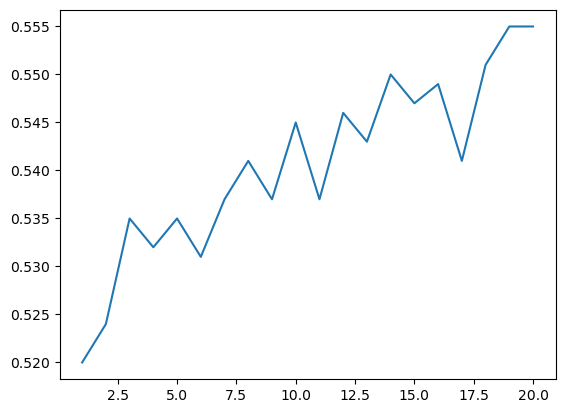

In [13]:
plt.plot(range(1,21), accuracies)

---
# Try dropping the first 20% of each dataset


In [ ]:
#

---

In [10]:
df_trytrysee = pd.read_csv('data_2014_to_2024/full_training_data_ops_era.csv')
X = df_trytrysee.drop(columns=['Unnamed: 0','y'])
y = df_trytrysee['y']

In [11]:
X.head()

,ops_batter1_away_1,ops_batter2_away_1,ops_batter3_away_1,ops_batter4_away_1,ops_batter5_away_1,ops_batter6_away_1,ops_batter7_away_1,ops_batter8_away_1,ops_batter9_away_1,era_pitcher_away_1,...,ops_batter1_home_10,ops_batter2_home_10,ops_batter3_home_10,ops_batter4_home_10,ops_batter5_home_10,ops_batter6_home_10,ops_batter7_home_10,ops_batter8_home_10,ops_batter9_home_10,era_pitcher_home_10
0,0.40,1.200000,0.200000,0.40,0.50,0.833333,0.00,1.50,0.666667,0.60,...,0.500000,0.00,0.50,0.5,0.000000,0.25,0.50,0.333333,0.000000,0.800000
1,0.60,0.000000,2.000000,2.75,0.00,0.000000,0.75,0.00,0.500000,0.25,...,0.666667,0.25,1.25,0.0,0.000000,1.25,0.00,1.250000,1.750000,0.176367
2,0.25,0.500000,0.500000,0.25,0.50,0.000000,0.00,0.00,0.000000,0.00,...,1.000000,0.40,1.55,0.8,0.900000,1.40,0.20,0.933333,0.000000,1.750000
3,0.40,0.833333,1.166667,2.50,1.25,1.250000,0.75,0.25,2.000000,0.00,...,2.000000,1.00,0.00,0.6,1.416667,0.00,0.00,1.500000,0.500000,0.000000
4,0.50,0.500000,0.000000,1.75,0.50,0.833333,0.50,0.00,1.000000,0.80,...,0.800000,0.45,0.45,1.6,1.600000,0.40,1.35,0.400000,2.666667,0.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=3,           # Maximum depth of a tree
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance
importances = xgb_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Accuracy: 0.52
Feature: ops_batter1_away_1, Importance: 0.0056
Feature: ops_batter2_away_1, Importance: 0.0068
Feature: ops_batter3_away_1, Importance: 0.0041
Feature: ops_batter4_away_1, Importance: 0.0047
Feature: ops_batter5_away_1, Importance: 0.0039
Feature: ops_batter6_away_1, Importance: 0.0044
Feature: ops_batter7_away_1, Importance: 0.0027
Feature: ops_batter8_away_1, Importance: 0.0064
Feature: ops_batter9_away_1, Importance: 0.0071
Feature: era_pitcher_away_1, Importance: 0.0067
Feature: ops_batter1_away_2, Importance: 0.0054
Feature: ops_batter2_away_2, Importance: 0.0055
Feature: ops_batter3_away_2, Importance: 0.0000
Feature: ops_batter4_away_2, Importance: 0.0053
Feature: ops_batter5_away_2, Importance: 0.0057
Feature: ops_batter6_away_2, Importance: 0.0057
Feature: ops_batter7_away_2, Importance: 0.0055
Feature: ops_batter8_away_2, Importance: 0.0000
Feature: ops_batter9_away_2, Importance: 0.0061
Feature: era_pitcher_away_2, Importance: 0.0067
Feature: ops_batter1_away

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.5, 1, 5],
    'min_child_weight': [1, 3, 5, 7],
}

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,        # Number of random samples
    scoring='accuracy',
    cv=3,             # 3-fold cross-validation
    verbose=1,
    random_state=42
)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best Score: 0.5189533456108042


In [15]:
xgb_model2 = xgb.XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.01,     # Step size shrinkage
    max_depth=6,           # Maximum depth of a tree
    subsample=0.6,         # Subsample ratio of the training instances
    colsample_bytree=0.6,  # Subsample ratio of columns when constructing each tree
    min_child_weight = 7,
    gamma = 0,
    random_state=42
)

# Train the model
xgb_model2.fit(X_train, y_train)

# Make predictions
y_pred2 = xgb_model2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.2f}")


Accuracy: 0.54
